# Michelson Interferometer.

In [1]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

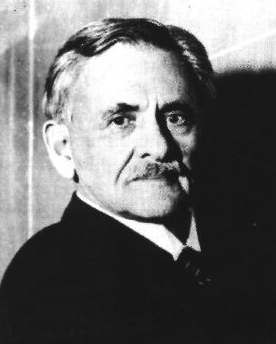

> *Figure 1. Albert Abraham Michelson, (source: wikipedia).*


Together with Edward Morley, Michelson carried out an experiment to measure the speed of the earth with respect to the "aether". The aether was thought to be the medium that carried light waves. To do so he developed an interferometer now known as the Michelson interferometer. Variations of this interferometer are used a lot today e.g. in the detection of gravitational waves. 


<div>
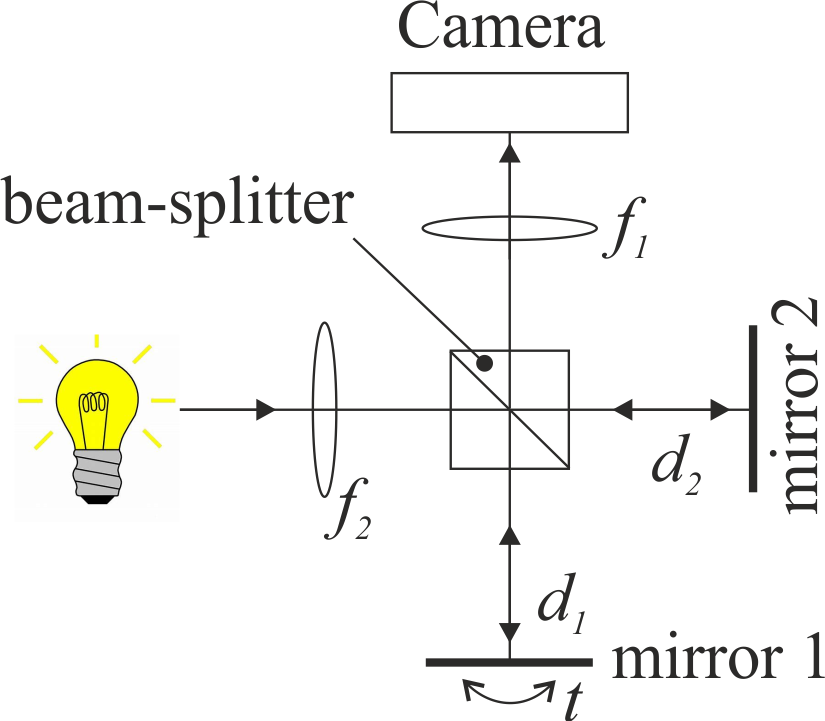
</div>

> *Figure 2. Schematic of the Michelson interferometer setup used in this simulation. The distance $d_1$ is fixed at 5 cm while the distance $d_2$ can be changed between 5 and 10 cm. Also the tilt $t$ of mirror 1 can be varied. The wavelength of the source is 632.8 nm*



The simplest form of a Michelson interferometer is shown in figure 2. It consists of two mutually perpendicular plane mirrors, one of which is mounted so that it can be moved along an axis perpendicular to its plane (surface). This movable mirror is normally moved at a constant velocity. Located between the fixed mirror and the movable mirror is a beamsplitter. The beamsplitter divides the input beam of radiation into two beams. That is, the input beam is partially reflected to the fixed mirror M1 and partially transmitted to the movable mirror M2.

After the beams return to the beamsplitter they interfere and are again partially reflected and partially transmitted. Because of the effect of interference, the intensity of each beam, one passing to the detector and the other returning to the source, depends on the difference of path lengths of the two arms of the interferometer. The variation in the intensity of the beams seen by the detector is a function of the path difference and a graph or plot of this intensity is know as an interferogram. 

The lenses $f_2$ and $f_1$ can be inserted to create a ringshaped interference pattern at the focal plane of lens $f_1$. 

in this simulation you can investigate some properties of the interferometer.


### 1. Investigate the ring pattern observed at the screen.

   1. In the simulation make sure you have the two lenses $f_1$ and $f_2$ inserted.
   2. Use the fine displacement of the mirror $d_1$ and observe the changes in the interference pattern. Explain the result.
   2. Show that the radii of the rings in the pattern as observed in the focal plane of $f_1$ satisfy the following relation:
   
   $$ y_m^2 = \frac{f_1^2 \lambda}{\left | d_2 - d_1 \right |} \left ( m_0 + m \right ) $$
   
   , where $m$ is an integer counting the rings; and $m_0$ is an offset value between 0 and 1 to account for the fact that at some given arm length difference the optical pathlength difference at the optical axis is not always exactly a multiple of the wavelength.
   
   3. Measure (use the mouse cursor in the image) the radii of the rings for some value of $d_2$ and plot the radii as a function of 
        the ring-number. (Plot such that you obtain a straight line!).
   4. Determine the difference in arm lengths $d_2-d_1$ using the results from (3) and check the result.
   5. Repeat the above steps for at least one other arm length difference.


### 2. Questions.

   
   1. How can you experimentally determine (by observing the pattern on the screen) if the arm lengths of the interferometer are equal?
   2. Remove the two lenses and explain the observed pattern. How does this pattern change if you move the mirror?
   3. Change the tilt of the mirror and explain the observed pattern.

Literature: Hecht, 5th ed., chapter 9. 


<IPython.core.display.Javascript object>


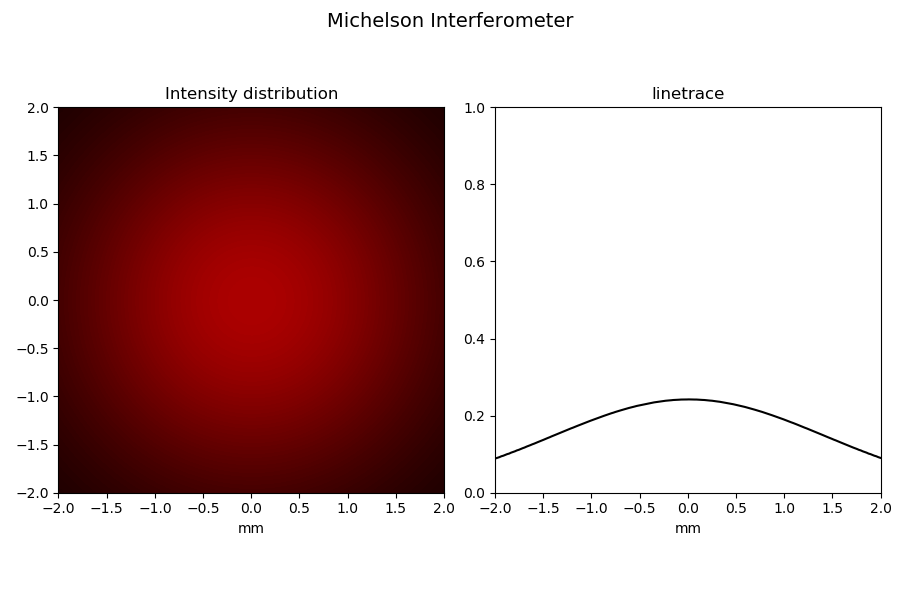

interactive(children=(Checkbox(value=True, description='Insert lenses f1 (150.0 mm) and f2 (150.0 mm)', layout…

In [3]:
%matplotlib notebook

#!/usr/bin/env python
"""
    Computer practical 4. Newton rings.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates the Newton rings experiment.
    Measure the radii of the rings and find the radius of curvature
    of the lens.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    adapted by j.s.kanger 2019
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import LightPipes as lp


# Define some constants
wavelength = 632.8e-9 #wavelength of HeNe laser
size = 8e-3 # size of the grid for calculation
size_image = 4e-3 # size of the image being displayed
N = 400 # number (NxN) of grid pixels
R = 2e-3 # laser beam radius
d1 = 5e-2 # length of arm 1
d2 = 7e-2 # length of arm 2
z3 = 15e-2 # distance laser to beamsplitter (taken to be same as f2)
z4 = 1e-2 # distance beamsplitter to screen
Rbs = 0.5 # reflection beam splitter
tx, ty = 0e-4, 0. # tilt of mirror 1
f1 = 150e-3 # focal length of lens 1
f2 = 150e-3 # focal length of lens 2


# setup the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,6))
fig.suptitle(f'Michelson Interferometer', fontsize=14)

# axes 1 contains the pattern
ax1.set_aspect('equal', 'box')
ax1.set_title('Intensity distribution')
limit = size_image*1e3/2
ax1.set_xlim(-limit, limit)
ax1.set_ylim(-limit, limit)
ax1.set_xlabel('mm')
ext = size*1e3/2
img = ax1.imshow([[]], interpolation='bicubic', cmap='hot', vmin=0, vmax=1, extent=[-ext, ext, -ext, ext])

# axes 2 contains an image of the setup
ax2.set_title('linetrace')
ax2.set_xlabel('mm')
ax2.set_xlim(-limit, limit)
ax2.set_ylim(0, 1)
ax2.set_aspect((2*limit))
line, = ax2.plot([],[],'k')
x_scale = np.linspace(-ext, ext, N, endpoint=True)

plt.tight_layout()
plt.show()

# create the input beam
Fnull = lp.Begin(size, wavelength, N)
Fnull = lp.GaussAperture(R, 0, 0, 1, Fnull)

def Michelson(toggle_lens, d_course, d_fine, t):
    """
    Calculates and shows the output of the Michelson interferometer
    """
    tx = t*1e-3
    d2 = d_course*1e-2 + d_fine*1e-9
    
    #insert positive lens f2 (optional) and propagate to the beamsplitter::
    if toggle_lens:
        F = lp.Lens(f2, 0, 0, Fnull)
        F = lp.Forvard(z3, F)
    else:
        F = lp.Forvard(z3, Fnull)

    #Split the beams:
    F20 = lp.IntAttenuator(1-Rbs, F)
    F10 = lp.IntAttenuator(Rbs, F)

    #propagate to- and back from the mirror #1:
    F1 = lp.Forvard(d1, F10)
    F1 = lp.Tilt(tx, ty, F1)
    F1 = lp.Forvard(d1, F1)
    
    #propagate to- and back from the mirror #2:
    F2 = lp.Forvard(d2*2, F20)
    
    # pass through the beamsplitter
    F1 = lp.IntAttenuator(1-Rbs, F1)
    F2 = lp.IntAttenuator(Rbs, F2)

    #Recombine the two beams and propagate to the screen:
    F = lp.BeamMix(F1, F2)
    if toggle_lens:
        F = lp.Lens(f1, 0, 0, F)
    F = lp.Forvard(f1, F)
    I = lp.Intensity(0, F)

    # plot the intensity as an image
    #img.set_array(I[crop:N+1-crop,crop:N+1-crop])
    img.set_data(I)
    #img.autoscale()
    line.set_data(x_scale, I[int(N/2)][:])
    ax1.format_coord = lambda x, y: \
                        f'x = {x:2.2f} mm, y = {y:2.2f} mm, Intensity = '     
    
    return None



# start the interactive plot
w = interact(Michelson,\
             toggle_lens = widgets.Checkbox(layout={'width': 'initial'}, style={'description_width': 'initial'}, \
                                            value=True,description=f'Insert lenses f1 ({f1*1e3} mm) and f2 ({f2*1e3} mm)',disabled=False),\
             t = widgets.FloatSlider(layout={'width': 'initial'},style={'description_width': 'initial'},\
                                     description=r'$t$ [mrad]', min=-3, max=3, step=0.1, value=0, \
                                     continuous_update=False, readout_format='.1f'),
             d_course = widgets.FloatSlider(layout={'width': 'initial'},style={'description_width': 'initial'},\
                                            description=r'$d_2$ course [cm]', min=4.5, max=10, step=0.1, value=7, \
                                     continuous_update=False, readout_format='.1f'), \
             d_fine = widgets.FloatSlider(layout={'width': 'initial'},style={'description_width': 'initial'}, \
                                          description=r'$d_2$ fine [nm]', min=0, max=wavelength*1e9, step=10, value=0, \
                                     continuous_update=False, readout_format='.1f')
          )

